In [1]:
import numpy as np
import pandas as pd
import os
import random
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.dummy import DummyRegressor
from sklearn.metrics import r2_score
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [2]:
# Print TF version, keep the version in mind when you look the documentation.
print('TensorFlow version: {}'.format(tf.__version__))

TensorFlow version: 2.0.0


## Read Data

In [3]:
work_dir = r'C:\Users\tangc\OneDrive\Desktop\Files\HW\Datathon'
print(os.listdir(work_dir))

['.ipynb_checkpoints', '1', '2', 'EDA.ipynb', 'Finite_Element_Model.png', 'Introduction.ipynb', 'Joined_Melt_Pool', 'Meltpool.png', 'meltpool_1_nn.ipynb', 'meltpool_2_nn.ipynb', 'Merging data.ipynb', 'MergingData_TempPrediction.ipynb', 'my_logs', 'Predict.ipynb', 'prediction_submission.csv', 'README.docx', 'saved_models', 'temperature_2_nn.ipynb']


In [4]:
train_temp_2 = pd.read_csv(work_dir + r"\2\Training\random_samples_temp_50.csv").drop(["Unnamed: 0"], axis=1)
cv_temp_2 = pd.read_csv(work_dir + r"\2\Training\random_samples_temp_10.csv").drop(["Unnamed: 0"], axis=1)

In [5]:
print(train_temp_2.shape)
print(train_temp_2.columns)
train_temp_2.head()

(3448235, 9)
Index(['X_Coord', 'Y_Coord', 'Z_Coord', 'Edge_Distance', 'Laser_Direction',
       'Temp', 'LasPower', 'LasSpeed', 'LasAngle'],
      dtype='object')


,X_Coord,Y_Coord,Z_Coord,Edge_Distance,Laser_Direction,Temp,LasPower,LasSpeed,LasAngle
0,0.176231,-0.200626,0.00,0.0658,-1,0.00091,200.0,0.6,70
1,0.176231,-0.200626,-0.03,0.0658,-1,0.00088,200.0,0.6,70
2,0.176231,-0.200626,-0.06,0.0658,-1,0.00078,200.0,0.6,70
3,0.176231,-0.200626,-0.09,0.0658,-1,0.00072,200.0,0.6,70
4,0.176231,-0.200626,-0.12,0.0658,-1,0.00068,200.0,0.6,70


In [6]:
X_2_train = train_temp_2.drop(["Temp"], axis=1)
y_2_train = train_temp_2[["Temp"]]
X_2_cv = cv_temp_2.drop(["Temp"], axis=1)
y_2_cv = cv_temp_2[["Temp"]]

In [7]:
# Tensor Board
root_logdir = os.path.join(os.curdir, "my_logs")
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir()
run_logdir
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [8]:
def r_square(y_true, y_pred):
    from tensorflow.keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return -( 1 - SS_res/(SS_tot + K.epsilon()) )

In [20]:
keras.backend.clear_session()
del model_temp_2

inputs = keras.Input(shape=[8])

for i in range(4):
    model_temp_2 = keras.layers.Dense(10 + i, activation="relu", kernel_initializer="he_normal")(inputs)
model_temp_2 = keras.layers.BatchNormalization(momentum=0.15)(model_temp_2)

for i in range(2):
    model_temp_2 = keras.layers.Dense(20 + i, activation="relu", kernel_initializer="he_normal")(model_temp_2)
model_temp_2 = keras.layers.BatchNormalization(momentum=0.15)(model_temp_2)
model_temp_2 = keras.layers.Dropout(rate=0.15)(model_temp_2)

for i in range(2):
    model_temp_2 = keras.layers.Dense(40 + i, activation="relu", kernel_initializer="he_normal")(model_temp_2)
model_temp_2 = keras.layers.BatchNormalization(momentum=0.15)(model_temp_2)

for i in range(2):
    model_temp_2 = keras.layers.Dense(80 + i, activation="elu", kernel_initializer="he_normal")(model_temp_2)
model_temp_2 = keras.layers.BatchNormalization(momentum=0.15)(model_temp_2)
model_temp_2 = keras.layers.Dropout(rate=0.15)(model_temp_2)

for i in range(2):
    model_temp_2 = keras.layers.Dense(160 + i, activation="elu", kernel_initializer="he_normal")(model_temp_2)
model_temp_2 = keras.layers.BatchNormalization(momentum=0.15)(model_temp_2)
model_temp_2 = keras.layers.Dropout(rate=0.15)(model_temp_2)

for i in range(2):
    model_temp_2 = keras.layers.Dense(320 + i, activation="elu", kernel_initializer="he_normal")(model_temp_2)
model_temp_2 = keras.layers.BatchNormalization(momentum=0.15)(model_temp_2)
model_temp_2 = keras.layers.Dropout(rate=0.15)(model_temp_2)

outputs = keras.layers.Dense(1)(model_temp_2)

model_temp_2 = keras.models.Model(inputs=inputs, outputs=outputs)

model_temp_2.compile(optimizer='adam', loss=r_square)

In [21]:
batch_size = 32
history = model_temp_2.fit(X_2_train, y_2_train, batch_size=batch_size,
                              epochs = 2, validation_data = (X_2_cv, y_2_cv), 
                              callbacks=[tensorboard_cb])

Train on 3448235 samples, validate on 1016827 samples
Epoch 1/2
3448235/3448235 [==============================] - 874s 254us/sample - loss: 0.0025 - r_square: -4.1832 - val_loss: 9.0182e-04 - val_r_square: -0.0527
Epoch 2/2
3448235/3448235 [==============================] - 934s 271us/sample - loss: 8.3109e-04 - r_square: -0.0624 - val_loss: 9.2674e-04 - val_r_square: -0.0531


In [22]:
y_2_cv_pred = model_temp_2.predict(X_2_cv)

In [23]:
r2_score(y_2_cv, y_2_cv_pred)

-0.02767428889610657

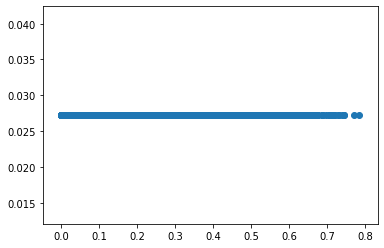

In [24]:
plt.scatter(y_2_cv, y_2_cv_pred)